## Final Project Submission

Please fill out:
* Student name: Kipkirui Kenneth
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 22/03/2024
* Instructor name: Diana mongina
* Blog post URL:


1 ## INTRODUCTION

The project's primary objective is to generate insights that will enable Microsoft to enter and succeed in the film industry. To provide useful information that will aid in determining the kind of movies Microsoft should produce, I will employ exploratory data analysis.

1.1  Objectives

-Examine and evaluate the kinds of movies that are currently doing the best at the box office, and use the results to guide your decision about what kinds of movies to make.
-Filling up datasets into pandas
- Getting data from DataFrame
- Data preparation
- Data cleaning
- Explonatory Data analysis(EDA)
- Data visualizaion

1.2 Questions to answer
.How strong is the correlation between a movie's popularity and the number of votes it receives?
.Does the relationship between popularity and vote average/vote counts differ across genres or years of release?
.What might be the reasons behind the observed relationships between popularity, vote averages, and vote counts?
.Is there a correlation between the vote average and another variable, such as budget or release year?
.How does the distribution of vote averages compare between genres?
.What is the mean vote average for the movies in the dataset?

2 The Data

In the folder zippedData are movie datasets from:
         -Box Office MojoLinks(bom.movie_gross.csv)
         -IMDBLinks(im.db)
         -Rotten TomatoesLinks(rt.movie_info.tsv
)
         -TheMovieDBLinks(tmdb.movies.csv)
         -The Numbers(tn.movie_budgets.csv)
         
2.1  Importing the relevant libraries


In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3
import csv
import numpy as np
import datetime

In [3]:
# importing visualisation Data tools
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

2.2 Examining the database

Fill a Dataframe with the information from tn.movie_budgets.csv
2.2.1 



In [105]:
# Load the data from tn.movie_budgets.csv into a DataFrame
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Convert relevant columns to numeric data types
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
movies_budget[columns_to_convert] = movies_budget[columns_to_convert].replace('[^.0-9]', '', regex=True).astype({'production_budget': 'float32', 'domestic_gross': 'float32', 'worldwide_gross': 'float64'})
movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08


In [63]:
missing_values = movies_budget.isna().sum()
missing_values

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
international_gross    0
dtype: int64

In [20]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


In [46]:
movies_budget.shape

(5234, 7)

The movies budget has 6 columns and 5,782 rows. The columns of id, release date, movie, production budget, domestic gross and worldwide gross

In [26]:
# Calculate international gross by subtracting domestic gross from worldwide gross
movies_budget['international_gross'] = movies_budget['worldwide_gross'] - movies_budget['domestic_gross']

movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08


In [27]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5782 non-null   int64  
 1   release_date         5782 non-null   object 
 2   movie                5782 non-null   object 
 3   production_budget    5782 non-null   float32
 4   domestic_gross       5782 non-null   float32
 5   worldwide_gross      5782 non-null   float64
 6   international_gross  5782 non-null   float64
dtypes: float32(2), float64(2), int64(1), object(2)
memory usage: 271.2+ KB


2.2.2 Filtering

Empty rows are removes that is, rows without domestic,worldwide and international gross

In [47]:
movies_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000.0,401.0,4.010000e+02,0.000000e+00
5518,19,"Oct 13, 2005",The Dark Hours,400000.0,423.0,4.230000e+02,0.000000e+00
5769,70,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,0.000000e+00
5466,67,"May 11, 2018",Higher Power,500000.0,528.0,5.280000e+02,0.000000e+00
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000.0,673.0,6.730000e+02,0.000000e+00
...,...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270656.0,1.648855e+09,9.965843e+08
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363968.0,2.208208e+09,1.548844e+09


In [48]:
#drop all all rows without the gross values
movies_budget_drop = movies_budget[(movies_budget['domestic_gross'] == 0) & (movies_budget['worldwide_gross'] == 0)]

In [50]:
movies_budget.drop(movies_budget_drop.index, axis=0, inplace=True)
movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440082e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08,6.795468e+08


2.3  Box Office Mojo Dataset

2.3.1 Fill a Dataframe with the information from bom.movie_gross.csv.gz

The Box office Mojo Dataset gives us data about domestic gross values and the foreign gross.


In [56]:
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [57]:
movies_gross.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [58]:
movies_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [59]:
#What is the shape of this dataset?

movies_gross.shape

(3387, 5)

In [60]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [61]:
missing_values = movies_gross.isna().sum()
missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

2.3.2 Filtering
Empty rows are removes that is,empty row are removed from the information on the domestic gross values and the foreign gross

In [64]:
movies_gross.sort_values('domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.0,NaN,2013
2321,The Chambermaid,FM,300.0,NaN,2015
2756,News From Planet Mars,KL,300.0,NaN,2016
2757,Satanic,Magn.,300.0,NaN,2016
1018,Apartment 143,Magn.,400.0,426000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [110]:
movies_gross.dropna(axis=0, inplace = True)
movies_gross.head(10)

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


2.4 IMDB dataset

In [85]:
import sqlite3
conn = sqlite3.connect('zippedData/im.db.zip')
cur = conn.cursor()

In [102]:
import sqlite3
conn = sqlite3.connect('zippedData/im.db.gz')

# Read all tables from the database into pandas dataframes
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Display the names of all tables in the database
print(tables)

Empty DataFrame
Columns: [name]
Index: []


2.4 Rotten tomatoes dataset

2.4.1 Fill a Dataframe with the information from rt.movie_info.tsv.gz

we need to find the dataset found in Rotten tomatoes

In [74]:
import pandas as pd

reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
reviews.tail(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002"
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


shows the last 10 dataset found in Rotten tomatoes

In [75]:
import pandas as pd

reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


The first 10 Dataset found in Rotten tomatoes

In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [77]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

2.4.1 Data cleaning

we need to clean the data by dropping the empty sets and duplicate dataset

In [79]:
reviews.duplicated().sum()

9

In [107]:
reviews.dropna(axis=0, inplace = True)
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


It is not possile to draw reliable conclusions on ratings and reviews based on the data available in the reviews dataframe because not all are intergers

## Data visualization and Data analysis

The dataset contains information about movies, including genre IDs, original language, original title, popularity, release date, title, vote average, and vote count. We can visualize relationships between numerical variables such as popularity, vote average, and vote count. Let's start by plotting hisograms and scatterplots showing the relationship between frequency and vote average,popularity and vote average and then popularity and vote count 

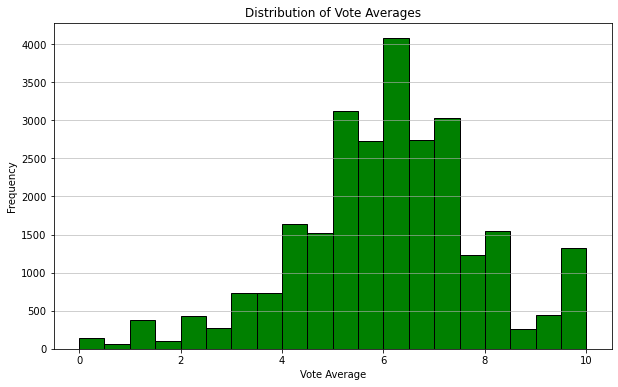

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Plotting the distribution of vote averages
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(df['vote_average'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The visualization showing the distribution of vote averages for movies. This histogram illustrates how the vote averages are distributed across the dataset, with the majority of movies receiving vote averages in the middle range.
The histogram above illustrates the distribution of vote averages for movies in the dataset. It shows that most movies have vote averages clustered around the middle range, with a peak occurring between 6 and 7. This suggests that the majority of movies are rated above average but not exceptionally high. There's a noticeable decline in frequency as the vote averages approach both the lower and higher ends of the scale, indicating fewer movies with very low or very high ratings.

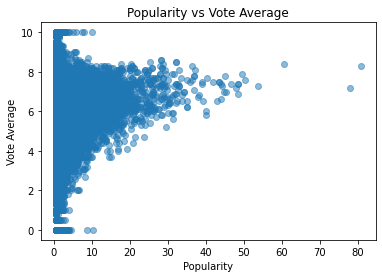

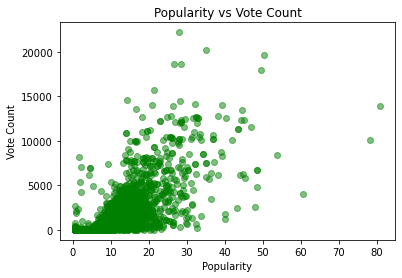

Plots generated successfully.


In [99]:
import matplotlib.pyplot as plt

# Setting the background color to white for visibility
plt.figure(facecolor='white')

# Scatter plot for Popularity vs Vote Average
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# Scatter plot for Popularity vs Vote Count
plt.figure(facecolor='white')
plt.scatter(df['popularity'], df['vote_count'], alpha=0.5, color='green')
plt.title('Popularity vs Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()
print('Plots generated successfully.')

These scatter plots visualize the relationships between the movies' popularity and their vote averages, as well as popularity and vote counts. The first plot shows how popularity correlates with vote average, while the second plot illustrates the relationship between popularity and the number of votes a movie receives.

Box Office Mojo Dataset

The dataset to identify suitable variables for these visualizations are numerical data such as domestic_gross, foreign_gross, and year. We can explore relationships between domestic_gross and foreign_gross